# Policy Iteration

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

In [2]:
MAX_MOVE = 5
REQUEST_FIRST = 3
REQUEST_SECOND = 4
RETURNS_FIRST  = 3
RETURNS_SECOND = 2
CREDIT = 10

In [3]:
def curve(iterations,policy,max_possible_capacity):
    fig = sns.heatmap(np.flipud(policy), cmap="YlGnBu", ax=axes[iterations])
    fig.set_ylabel('# capacity at first location', fontsize=30)
    fig.set_yticks(list(reversed(range(max_possible_capacity + 1))))
    fig.set_xlabel('# capacity at second location', fontsize=30)
    fig.set_title('policy {}'.format(iterations), fontsize=30)   

In [4]:
def optimal_curve(iterations,value,max_possible_capacity):
    fig = sns.heatmap(np.flipud(value), cmap="YlGnBu", ax=axes[-1])
    fig.set_ylabel('# capacity at first location', fontsize=30)
    fig.set_yticks(list(reversed(range(max_possible_capacity + 1))))
    fig.set_xlabel('# capacity at second location', fontsize=30)
    fig.set_title('optimal value', fontsize=30)

In [5]:
poisson_cache = dict()
def poisson_probability(n, lam):
    global poisson_cache
    key = n * 10 + lam
    if key not in poisson_cache:
        poisson_cache[key] = poisson.pmf(n, lam)
    return poisson_cache[key]

def expected_return(state, action, state_value,gamma,purchase_cost):
    value = 0
    value -= purchase_cost * abs(action)
    sta_num1 = min(state[0] - action, 20)
    sta_num2 = min(state[1] + action, 20)
    for request_first in range(11):
        for request_second in range(11):
            prob = poisson_probability(request_first,REQUEST_FIRST) * poisson_probability(request_second,REQUEST_SECOND)
            num_of_first = sta_num1
            num_of_second = sta_num2
            vid_first= min(num_of_first,request_first)
            vid_second = min(num_of_second,request_second)
            reward = (vid_first + vid_second) * CREDIT
            num_of_first -= vid_first
            num_of_second -= vid_second
            returned_first = RETURNS_FIRST
            returned_second = RETURNS_SECOND
            num_of_first = min(num_of_first + returned_first,20)
            num_of_second = min(num_of_second + returned_second,20)
            value += prob * (reward + gamma * state_value[num_of_first,num_of_second])          
    return value

In [6]:
def policy_evaluation(initial_value,policy,gamma,purchase_cost):
    while True:
        old_value = initial_value.copy()
        for i in range(21):
            for j in range(21):
                state=[i, j]
                value[i, j] = expected_return(state,policy[i, j],initial_value,gamma,purchase_cost)
        max_value_change = abs(old_value - value).max()
        print('max value change {}'.format(max_value_change))
        if max_value_change < 1e-4:
            break
    return value

In [7]:
def policy_improvement(value,gamma,purchase_cost):
    pi_holder=[]
    new_policy=np.zeros([21,21])
    for i in range(21):
        for j in range(21):  
            state=[i,j]
            action_array=[-5,-4,-3,-2,-1,0,1,2,3,4,5]
            for k in action_array:
                pi=expected_return(state,k,value,gamma,purchase_cost)
                pi_holder.append(pi)
            max_val=max(pi_holder)
            max_index = pi_holder.index(max_val)
            new_policy[i,j]=action_array[max_index]
            pi_holder=[]   
    return new_policy

## Discount factor == 0.9

max value change 196.62783361783852
max value change 134.98823859766583
max value change 91.41415360228919
max value change 67.17097732555729
max value change 51.29055484635097
max value change 38.49091000659837
max value change 29.406139835126424
max value change 25.7210573245398
max value change 22.381602293031023
max value change 19.40385808254939
max value change 16.77577350573091
max value change 14.47251552455765
max value change 12.464101852186843
max value change 10.719367983418692
max value change 9.20806226246873
max value change 7.9019189666795455
max value change 6.775146571130392
max value change 5.8045764710083745
max value change 4.969618520007145
max value change 4.252112693842776
max value change 3.6361309524054946
max value change 3.107761240497666
max value change 2.654891834022692
max value change 2.26700589940549
max value change 1.9349911763441128
max value change 1.650966802154585
max value change 1.4081276418079938
max value change 1.2006055672075036
max value c

max value change 0.0008154469392138708
max value change 0.0004459807777266178
max value change 0.0002340408432246477
max value change 0.00012037610895276885
max value change 6.173777182993945e-05


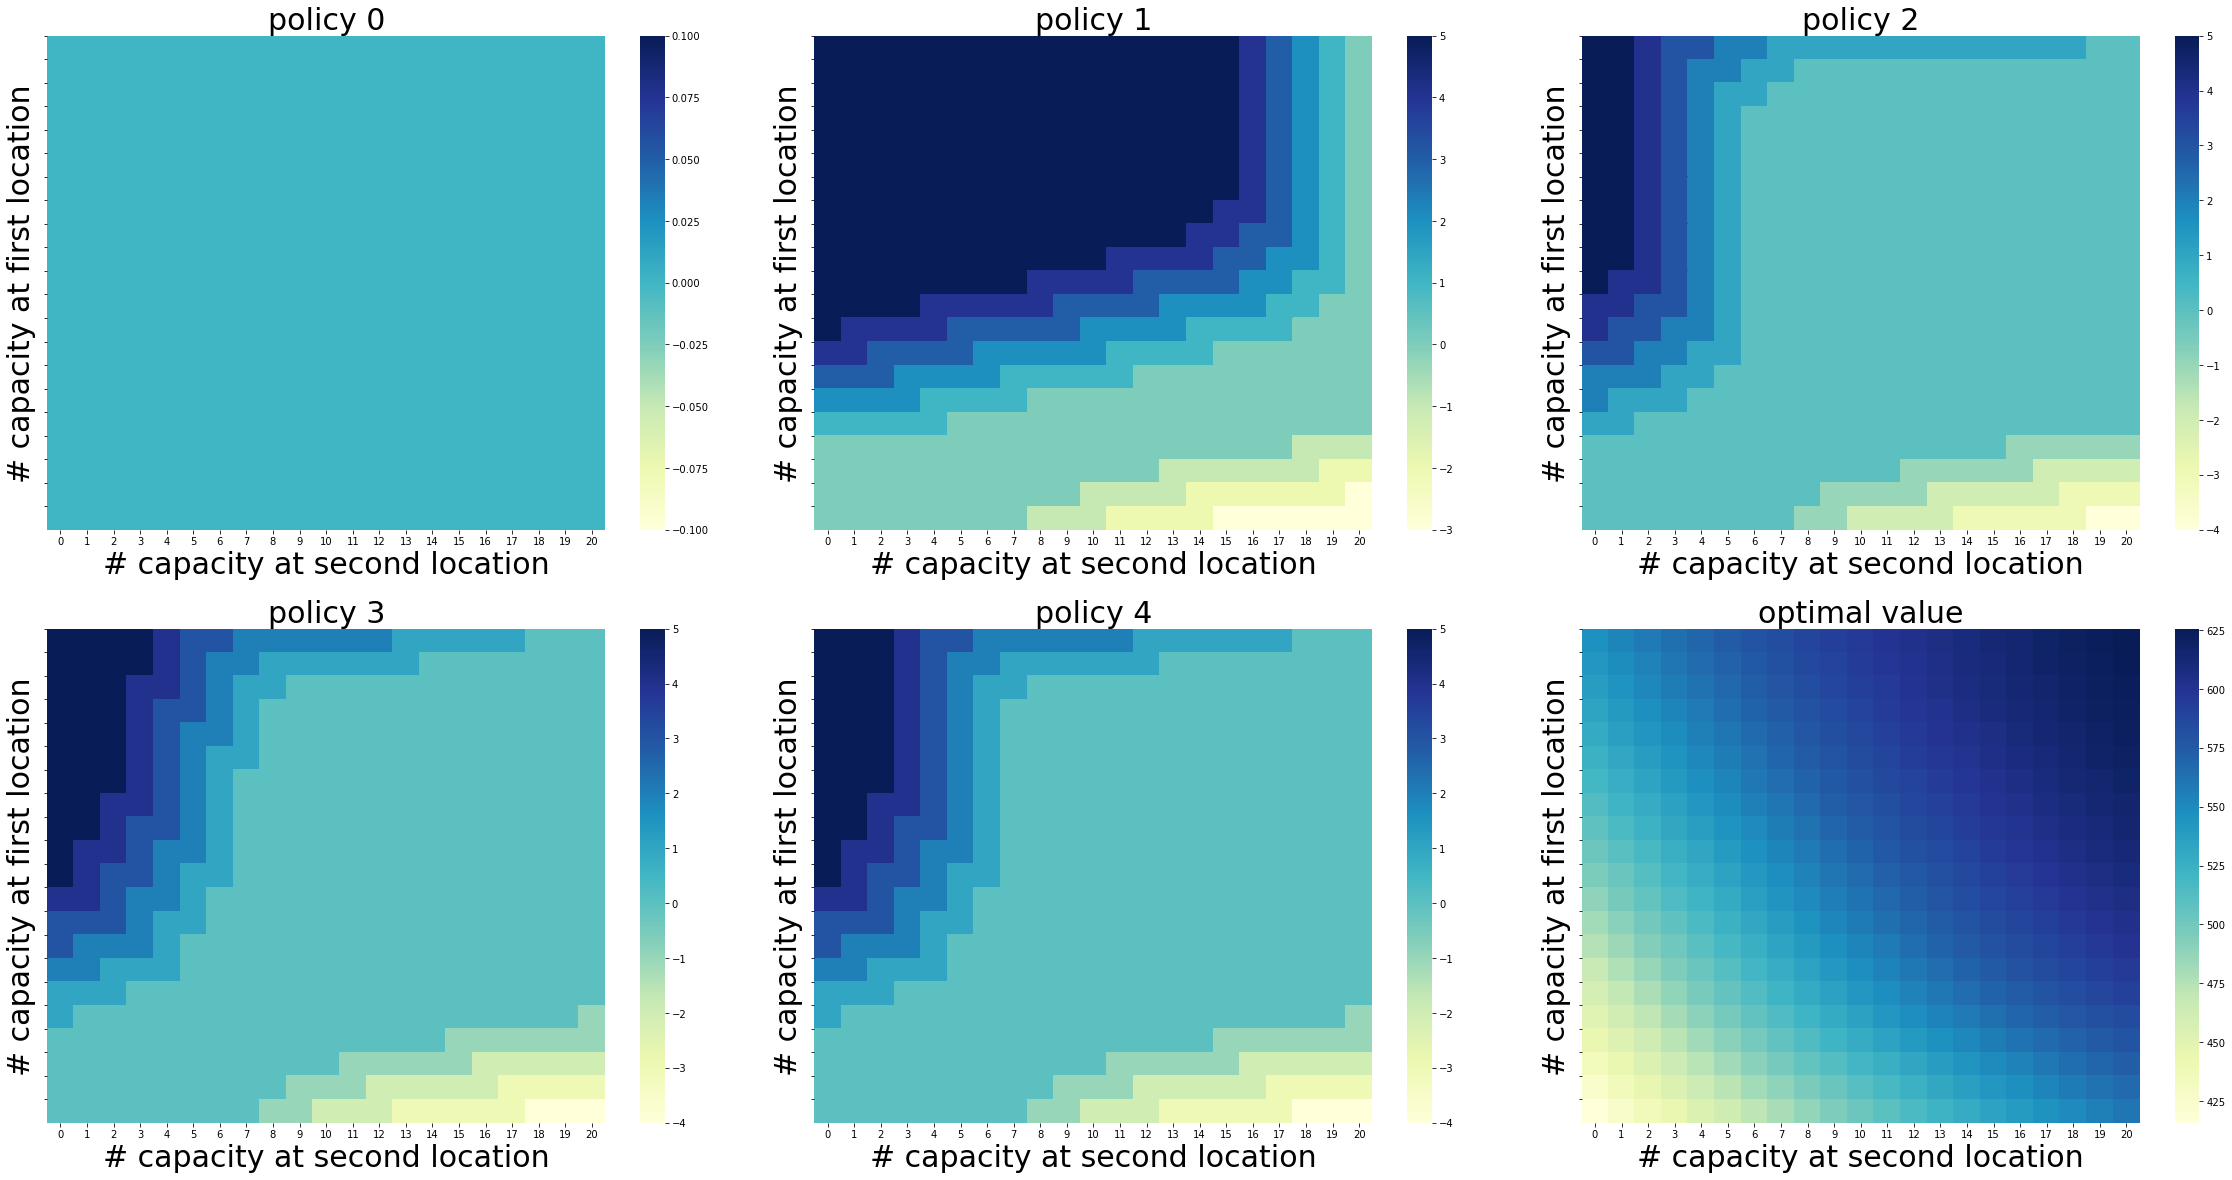

[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  3  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  4  3  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  4  3  3  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  4  4  3  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  5  4  3  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  5  4  4  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  5  5  4  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  5  5

In [8]:
gamma=0.9
MAX_capacity=20
purchase_cost=2
value = np.zeros((MAX_capacity + 1, MAX_capacity + 1))
policy = np.zeros(value.shape, dtype=np.int)
iterations = 0
_, axes = plt.subplots(2, 3, figsize=(40, 20))
plt.subplots_adjust(wspace=0.1, hspace=0.2)
axes = axes.flatten()
while True:
    curve(iterations,policy,20)
    policy=policy.astype(int)
    old_policy=policy.copy()
    value=policy_evaluation(value,policy,gamma,purchase_cost)
    policy=policy_improvement(value,gamma,purchase_cost)
    policy=policy.astype(int)      
    if np.array_equal(old_policy,policy)==True:
        optimal_curve(iterations,value,20)
        break 
    iterations += 1
plt.show()
print(policy)

## Changing the Purchase Cost == 6

max value change 196.62783361783852
max value change 134.98823859766583
max value change 91.41415360228919
max value change 67.17097732555729
max value change 51.29055484635097
max value change 38.49091000659837
max value change 29.406139835126424
max value change 25.7210573245398
max value change 22.381602293031023
max value change 19.40385808254939
max value change 16.77577350573091
max value change 14.47251552455765
max value change 12.464101852186843
max value change 10.719367983418692
max value change 9.20806226246873
max value change 7.9019189666795455
max value change 6.775146571130392
max value change 5.8045764710083745
max value change 4.969618520007145
max value change 4.252112693842776
max value change 3.6361309524054946
max value change 3.107761240497666
max value change 2.654891834022692
max value change 2.26700589940549
max value change 1.9349911763441128
max value change 1.650966802154585
max value change 1.4081276418079938
max value change 1.2006055672075036
max value c

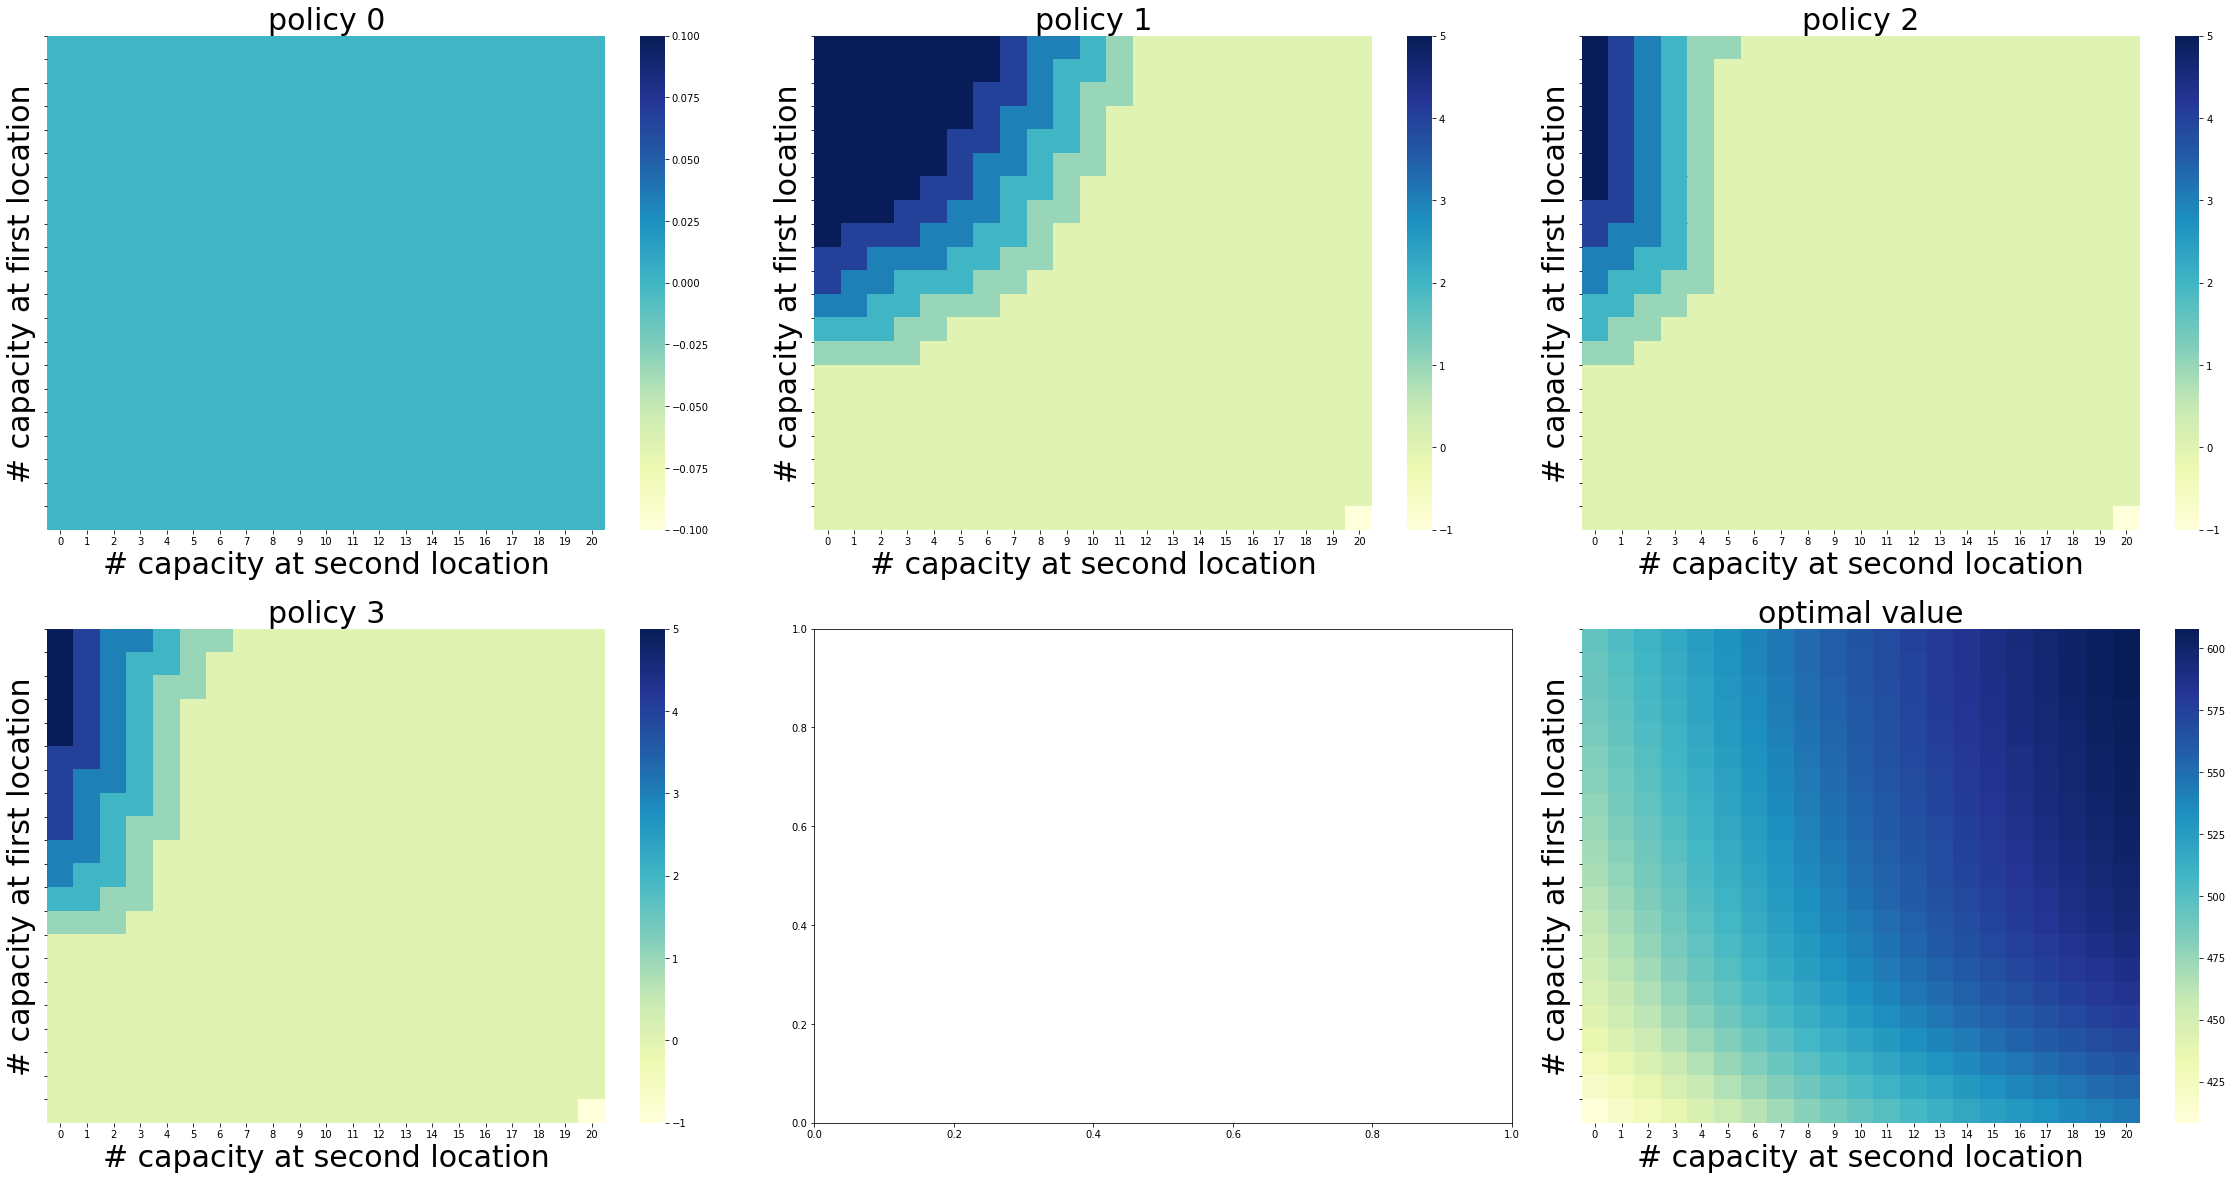

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  3  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  3  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  3  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  4  3

In [9]:
gamma=0.9
purchase_cost=6
MAX_capacity=20
value = np.zeros((MAX_capacity + 1, MAX_capacity + 1))
policy = np.zeros(value.shape, dtype=np.int)
iterations = 0
_, axes = plt.subplots(2, 3, figsize=(40, 20))
plt.subplots_adjust(wspace=0.1, hspace=0.2)
axes = axes.flatten()
while True:
    curve(iterations,policy,20)
    policy=policy.astype(int)
    old_policy=policy.copy()
    value=policy_evaluation(value,policy,gamma,purchase_cost)
    policy=policy_improvement(value,gamma,purchase_cost)
    policy=policy.astype(int)      
    if np.array_equal(old_policy,policy)==True:
        optimal_curve(iterations,value,20)
        break 
    iterations += 1
plt.show()
print(policy)

## Changing the Discount factor == 1

max value change 232.00900656182705
max value change 186.83118191135858
max value change 154.59592370347133
max value change 130.48470124466883
max value change 111.01941784900328
max value change 96.3351911469905
max value change 86.38379101796329
max value change 80.23660020960551
max value change 76.82579043531928
max value change 75.81575816023144
max value change 75.2484417215345
max value change 74.69285743508658
max value change 74.14892327654422
max value change 73.61653960002229
max value change 73.09555669890142
max value change 72.58576626050058
max value change 72.08690535742926
max value change 71.59866589237959
max value change 71.12070559097788
max value change 70.65265858067028
max value change 70.19414469103731
max value change 69.74477719832498
max value change 69.30416903247828
max value change 68.87193759904903
max value change 68.44770841644777
max value change 68.03111777283993
max value change 67.62181459046451
max value change 67.21946166058046
max value change 

max value change 24.80775948934206
max value change 24.688157939228404
max value change 24.5691329935853
max value change 24.450681873324356
max value change 24.332801812563048
max value change 24.215490058755677
max value change 24.098743872680643
max value change 23.982560528167596
max value change 23.86693731219748
max value change 23.75187152483886
max value change 23.637360479084236
max value change 23.523401500870023
max value change 23.409991929011085
max value change 23.2971291151498
max value change 23.184810423590534
max value change 23.073033231436057
max value change 22.96179492830379
max value change 22.851092916453126
max value change 22.74092461059263
max value change 22.631287437940045
max value change 22.522178838084074
max value change 22.41359626286794
max value change 22.305537176505823
max value change 22.197999055371838
max value change 22.090979388032792
max value change 21.98447567506082
max value change 21.878485429182547
max value change 21.773006175055343
max

max value change 8.123649510740506
max value change 8.084484241479004
max value change 8.045507793562138
max value change 8.006719256616634
max value change 7.968117724734839
max value change 7.929702296320102
max value change 7.891472074161356
max value change 7.853426165327619
max value change 7.815563681233471
max value change 7.777883737559023
max value change 7.740385454237185
max value change 7.703067955486404
max value change 7.6659303697033465
max value change 7.62897182947745
max value change 7.592191471660044
max value change 7.5555884371715365
max value change 7.519161871075994
max value change 7.482910922675728
max value change 7.446834745243905
max value change 7.410932496195528
max value change 7.375203336998311
max value change 7.339646433141752
max value change 7.304260954178972
max value change 7.2690460736484965
max value change 7.234000969056069
max value change 7.199124821894657
max value change 7.164416817588062
max value change 7.129876145520029
max value change 7

max value change 2.6346142626844085
max value change 2.621912412752863
max value change 2.609271800258284
max value change 2.596692129925941
max value change 2.584173107987226
max value change 2.5717144420359546
max value change 2.5593158410756587
max value change 2.5469770155450533
max value change 2.5346976772361813
max value change 2.5224775393544405
max value change 2.5103163165222213
max value change 2.4982137246479397
max value change 2.486169481113393
max value change 2.4741833045573003
max value change 2.462254915075391
max value change 2.4503840340803436
max value change 2.438570384267223
max value change 2.4268136897426302
max value change 2.4151136759064684
max value change 2.403470069531977
max value change 2.391882598583834
max value change 2.38035099253284
max value change 2.3688749819648365
max value change 2.357454298893572
max value change 2.346088676535146
max value change 2.3347778494862723
max value change 2.32352155352055
max value change 2.312319525763087
max valu

max value change 0.8669209061317815
max value change 0.8627413572048681
max value change 0.8585819584623096
max value change 0.8544426127646148
max value change 0.8503232234415918
max value change 0.8462236943087191
max value change 0.8421439295361779
max value change 0.8380838339653565
max value change 0.8340433126122662
max value change 0.830022271229609
max value change 0.8260206158665824
max value change 0.8220382530271308
max value change 0.818075089744525
max value change 0.8141310334322043
max value change 0.8102059919547173
max value change 0.806299873678654
max value change 0.8024125873562298
max value change 0.7985440421907697
max value change 0.794694147842165
max value change 0.7908628143541137
max value change 0.7870499523050967
max value change 0.7832554725646332
max value change 0.7794792865788622
max value change 0.7757213061286166
max value change 0.7719814434167347
max value change 0.7682596111262683
max value change 0.7645557223149808
max value change 0.7608696904735

max value change 0.28942663200359675
max value change 0.28803126504317333
max value change 0.28664262536949536
max value change 0.2852606805427058
max value change 0.283885398232087
max value change 0.28251674636157986
max value change 0.28115469298245443
max value change 0.2797992062060075
max value change 0.27845025446731597
max value change 0.27710780619599973
max value change 0.27577183005269035
max value change 0.2744422948671854
max value change 0.273119169551137
max value change 0.27180242320719117
max value change 0.2704920250635041
max value change 0.26918794457014883
max value change 0.26789015121539705
max value change 0.26659861470761825
max value change 0.26531330488433014
max value change 0.26403419171765563
max value change 0.2627612453270558
max value change 0.2614944360229856
max value change 0.2602337341704697
max value change 0.25897911032916454
max value change 0.2577305352242547
max value change 0.2564879796682362
max value change 0.25525141467005596
max value chan

max value change 0.09803791859121702
max value change 0.0975652638462634
max value change 0.0970948878366471
max value change 0.09662677958840504
max value change 0.09616092814212607
max value change 0.09569732262025354
max value change 0.09523595222708536
max value change 0.09477680617783335
max value change 0.09431987370589923
max value change 0.09386514419202285
max value change 0.09341260698602127
max value change 0.09296225152502302
max value change 0.09251406728981237
max value change 0.09206804382665723
max value change 0.09162417069092044
max value change 0.09118243754346622
max value change 0.0907428340306069
max value change 0.09030534996418282
max value change 0.08986997498504934
max value change 0.08943669908694574
max value change 0.08900551202896168
max value change 0.08857640382302634
max value change 0.08814936437374854
max value change 0.08772438376036007
max value change 0.08730145204390283
max value change 0.08688055930906557
max value change 0.08646169578787521
max 

max value change 0.033693509592922055
max value change 0.03353106841859699
max value change 0.03336941037014185
max value change 0.033208531685886555
max value change 0.03304842864781676
max value change 0.03288909747971047
max value change 0.032730534450820414
max value change 0.032572735888606985
max value change 0.03241569810779765
max value change 0.03225941741038696
max value change 0.03210389018386195
max value change 0.031949112761139986
max value change 0.03179508153880306
max value change 0.03164179293526104
max value change 0.0314892433489149
max value change 0.031337429230916314
max value change 0.03118634703423595
max value change 0.031035993206387502
max value change 0.03088636426946323
max value change 0.030737456740098423
max value change 0.030589267076720716
max value change 0.030441791879638913
max value change 0.03029502765457437
max value change 0.03014897103093972
max value change 0.030003618552655098
max value change 0.029858966838219203
max value change 0.02971501

max value change 0.011748840162908891
max value change 0.011692197365846368
max value change 0.011635827604550286
max value change 0.011579729603909072
max value change 0.011523902110639028
max value change 0.011468343740489217
max value change 0.011413053187425248
max value change 0.011358029272741987
max value change 0.01130327057944669
max value change 0.011248775919739273
max value change 0.011194543965757475
max value change 0.011140573471493553
max value change 0.011086863192758756
max value change 0.011033411832613638
max value change 0.010980218223267002
max value change 0.010927280995019828
max value change 0.010874599045564537
max value change 0.010822171037943917
max value change 0.010769995808004751
max value change 0.010718072137024137
max value change 0.010666398789908271
max value change 0.010614974564305157
max value change 0.010563798243310885
max value change 0.010512868691876065
max value change 0.010462184647622053
max value change 0.010411744970042491
max value cha

max value change 0.004136580299018533
max value change 0.0041166372520820005
max value change 0.004096790362382308
max value change 0.004077039146068273
max value change 0.004057383159306482
max value change 0.004037821974634426
max value change 0.004018355024527409
max value change 0.003998981967015425
max value change 0.00397970232188527
max value change 0.0039605155998287955
max value change 0.003941421391573385
max value change 0.003922419235095731
max value change 0.003903508704752312
max value change 0.003884689323967905
max value change 0.003865960690745851
max value change 0.003847322346700821
max value change 0.003828773864370305
max value change 0.0038103147999208886
max value change 0.003791944709519157
max value change 0.003773663220272283
max value change 0.003755469853786053
max value change 0.003737364198968862
max value change 0.003719345844729105
max value change 0.0037014143163105473
max value change 0.0036835692862950964
max value change 0.003665810294478433
max valu

max value change 0.001477693966080551
max value change 0.0014705697994941147
max value change 0.001463479964513681
max value change 0.0014564243119821185
max value change 0.001449402690923307
max value change 0.0014424149103433592
max value change 0.0014354608229041332
max value change 0.0014285402721725404
max value change 0.001421653074430651
max value change 0.001414799080521334
max value change 0.0014079781321925111
max value change 0.0014011900620971574
max value change 0.001394434741087025
max value change 0.0013877119763492374
max value change 0.0013810215896228328
max value change 0.0013743635172431823
max value change 0.0013677374936378328
max value change 0.0013611434515041765
max value change 0.0013545811798394425
max value change 0.0013480505567713408
max value change 0.0013415514076768886
max value change 0.0013350836070458172
max value change 0.0013286469711601967
max value change 0.00132224136905279
max value change 0.001315866667937371
max value change 0.001309522685914

max value change 0.0005304279475240037
max value change 0.000527870668520336
max value change 0.0005253257495496655
max value change 0.0005227930741966702
max value change 0.0005202726188144879
max value change 0.0005177642779017333
max value change 0.000515268095114152
max value change 0.0005127839121996658
max value change 0.0005103116927784868
max value change 0.0005078514132037526
max value change 0.0005054030025348766
max value change 0.0005029663680033991
max value change 0.000500541485962458
max value change 0.0004981283327651909
max value change 0.0004957267756253714
max value change 0.0004933367927151266
max value change 0.0004909583694825415
max value change 0.0004885913713223999
max value change 0.0004862358018726809
max value change 0.0004838916029257234
max value change 0.0004815586780750891
max value change 0.00047923701458785217
max value change 0.00047692654516140465
max value change 0.0004746272352349479
max value change 0.0004723389665741706
max value change 0.0004700

max value change 0.0001941170648933621
max value change 0.00019318121849210002
max value change 0.00019224984862376004
max value change 0.00019132298439217266
max value change 0.000190400594874518
max value change 0.0001894826564239338
max value change 0.00018856911083275918
max value change 0.0001876600035757292
max value change 0.00018675526553124655
max value change 0.0001858548948803218
max value change 0.00018495885888114572
max value change 0.00018406715935270768
max value change 0.00018317971989745274
max value change 0.00018229659508506302
max value change 0.0001814177321648458
max value change 0.00018054306747217197
max value change 0.00017967267012863886
max value change 0.00017880642917589284
max value change 0.0001779443737177644
max value change 0.00017708648738334887
max value change 0.00017623271378397476
max value change 0.00017538309293740895
max value change 0.00017453753025620244
max value change 0.0001736960475682281
max value change 0.00017285865760641173
max value

max value change 0.18847703992469178
max value change 0.1875605297009315
max value change 0.18664847618310887
max value change 0.18574085772888793
max value change 0.18483765275777841
max value change 0.18393883983844717
max value change 0.18304439755411295
max value change 0.18215430471173022
max value change 0.1812685401255294
max value change 0.18038708278982085
max value change 0.17950991169527697
max value change 0.17863700606721977
max value change 0.17776834509822947
max value change 0.176903908200984
max value change 0.17604367479543725
max value change 0.17518762447798508
max value change 0.174335736903231
max value change 0.17348799177671026
max value change 0.1726443690349697
max value change 0.17180484854725364
max value change 0.17096941044655978
max value change 0.1701380348222301
max value change 0.16931070194550557
max value change 0.16848739215129171
max value change 0.16766808588909043
max value change 0.16685276367752522
max value change 0.16604140613708296
max value

max value change 0.0635575319538475
max value change 0.0632484697525797
max value change 0.06294091044401284
max value change 0.06263484667942976
max value change 0.0623302712210716
max value change 0.06202717686574033
max value change 0.06172555632838339
max value change 0.06142540251130413
max value change 0.061126708234951366
max value change 0.06082946645983611
max value change 0.06053367006825283
max value change 0.060239312044359394
max value change 0.059946385386865586
max value change 0.059654883174516726
max value change 0.05936479843512643
max value change 0.05907612430928566
max value change 0.05878885391757649
max value change 0.05850298042969371
max value change 0.05821849708809168
max value change 0.05793539708975004
max value change 0.05765367373351182
max value change 0.05737332031822007
max value change 0.0570943301790976
max value change 0.05681669667865208
max value change 0.05654041324305581
max value change 0.05626547330939502
max value change 0.05599187029474706
m

max value change 0.02174836444828543
max value change 0.021642608340698644
max value change 0.021537366486882092
max value change 0.021432636414829176
max value change 0.021328415567040793
max value change 0.021224701587925665
max value change 0.021121491874509957
max value change 0.02101878407120239
max value change 0.0209165757169103
max value change 0.020814864325075177
max value change 0.020713647587399464
max value change 0.02061292301004869
max value change 0.02051268822469865
max value change 0.020412940848473227
max value change 0.02031367853123811
max value change 0.020214898890117183
max value change 0.02011659959134704
max value change 0.020018778268422466
max value change 0.019921432658520644
max value change 0.019824560398774338
max value change 0.019728159188161953
max value change 0.01963222677295562
max value change 0.019536760832124855
max value change 0.019441759124674718
max value change 0.019347219376868452
max value change 0.01925313935498707
max value change 0.019

max value change 0.007551568847702583
max value change 0.007514847691709292
max value change 0.007478305136828567
max value change 0.007441940275384695
max value change 0.007405752228805795
max value change 0.007369740156718763
max value change 0.007333903224207461
max value change 0.007298240529053146
max value change 0.007262751258167555
max value change 0.007227434565720614
max value change 0.007192289604063262
max value change 0.007157315541917342
max value change 0.007122511573470547
max value change 0.007087876801961102
max value change 0.00705341048342234
max value change 0.0070191117556532845
max value change 0.006984979803746683
max value change 0.006951013856451027
max value change 0.006917213002452627
max value change 0.006883576603286201
max value change 0.00685010371489625
max value change 0.0068167936133249896
max value change 0.006783645494579105
max value change 0.006750658531018416
max value change 0.006717832016875036
max value change 0.006685165104499902
max value ch

max value change 0.002647779236212955
max value change 0.0026349038453190587
max value change 0.0026220910585834645
max value change 0.002609340583148878
max value change 0.0025966520861402387
max value change 0.002584025309261051
max value change 0.002571459928731201
max value change 0.002558955658969353
max value change 0.0025465121689194348
max value change 0.002534129222112824
max value change 0.002521806474760524
max value change 0.002509543624910293
max value change 0.0024973404324555304
max value change 0.0024851966045389418
max value change 0.002473111770086689
max value change 0.002461085745380842
max value change 0.002449118177537457
max value change 0.0024372088118980173
max value change 0.002425357370157144
max value change 0.002413563548543607
max value change 0.0024018270614760695
max value change 0.002390147661571973
max value change 0.0023785250523360446
max value change 0.0023669589645578526
max value change 0.002355449127207976
max value change 0.0023439952401531627
m

max value change 0.0009420574133400805
max value change 0.0009374764522362966
max value change 0.0009329177682957379
max value change 0.000928381237827125
max value change 0.0009238667953468394
max value change 0.0009193742898787605
max value change 0.0009149036450253334
max value change 0.0009104547189053847
max value change 0.0009060274351213593
max value change 0.0009016216899908613
max value change 0.0008972373543656431
max value change 0.0008928743554861285
max value change 0.0008885325642040698
max value change 0.0008842118550091982
max value change 0.000879912202435662
max value change 0.0008756334354984574
max value change 0.0008713754796190187
max value change 0.0008671382347529288
max value change 0.0008629215699329507
max value change 0.0008587254560552537
max value change 0.0008545497075829189
max value change 0.0008503942626703065
max value change 0.0008462590449198615
max value change 0.0008421439215453574
max value change 0.0008380488161492394
max value change 0.00083397

max value change 0.000338459698468796
max value change 0.00033681386230455246
max value change 0.00033517603151267394
max value change 0.00033354616971337236
max value change 0.0003319242223369656
max value change 0.00033031017665052786
max value change 0.0003287039799033664
max value change 0.0003271055556979263
max value change 0.0003255149676988367
max value change 0.00032393205583503004
max value change 0.00032235688377113547
max value change 0.0003207893496437464
max value change 0.0003192294443579158
max value change 0.00031767712061991915
max value change 0.00031613235842087306
max value change 0.00031459507590625435
max value change 0.0003130653021798935
max value change 0.0003115429499302991
max value change 0.0003100280118815135
max value change 0.00030852044437779114
max value change 0.0003070201728405664
max value change 0.0003055272391065955
max value change 0.00030404154313146137
max value change 0.0003025630812771851
max value change 0.0003010917698702542
max value chang

max value change 0.00012339216118562035
max value change 0.00012279212933208328
max value change 0.00012219503696542233
max value change 0.00012160083315393422
max value change 0.00012100953426852357
max value change 0.00012042108937748708
max value change 0.00011983551121375058
max value change 0.00011925277976843063
max value change 0.00011867291686940007
max value change 0.00011809584066213574
max value change 0.00011752155478461646
max value change 0.00011695006833178923
max value change 0.0001163814031315269
max value change 0.0001158154755103169
max value change 0.000115252261821297
max value change 0.00011469185301393736
max value change 0.00011413412539695855
max value change 0.00011357914081600029
max value change 0.00011302681377856061
max value change 0.00011247721522522625
max value change 0.00011193025966349524
max value change 0.00011138597255921923
max value change 0.0001108443411794724
max value change 0.00011030533460143488
max value change 0.00010976894373015966
max v

max value change 0.26738757055500173
max value change 0.26606738785267225
max value change 0.26475372331697145
max value change 0.26344654475178686
max value change 0.2621458201629139
max value change 0.26085151768165815
max value change 0.25956360557029257
max value change 0.25828205232573964
max value change 0.25700682648675865
max value change 0.2557378968976991
max value change 0.25447523241018644
max value change 0.2532188021341426
max value change 0.25196857523587823
max value change 0.2507245211654663
max value change 0.24948660936388478
max value change 0.24825480957406398
max value change 0.2470290915844089
max value change 0.2458094253688614
max value change 0.24459578107052948
max value change 0.24338812892710848
max value change 0.24218643934000283
max value change 0.2409906829434476
max value change 0.23980083038077282
max value change 0.23861685250994924
max value change 0.23743872033992375
max value change 0.2362664050069725
max value change 0.23509987779470976
max value

max value change 0.0882343262055656
max value change 0.08779868344754505
max value change 0.08736519163358025
max value change 0.08693384008802241
max value change 0.08650461830984568
max value change 0.08607751570889377
max value change 0.08565252186599537
max value change 0.0852296263747121
max value change 0.08480881886134739
max value change 0.08439008899586042
max value change 0.08397342654279782
max value change 0.08355882131945691
max value change 0.08314626313404005
max value change 0.08273574187842314
max value change 0.0823272475045087
max value change 0.08192077001694997
max value change 0.08151629944586603
max value change 0.08111382586685068
max value change 0.08071333945372317
max value change 0.08031483036029385
max value change 0.07991828884769347
max value change 0.07952370520979457
max value change 0.07913106975320261
max value change 0.07874037286819657
max value change 0.07835160498507321
max value change 0.0779647565959749
max value change 0.0775798181675782
max va

max value change 0.029551711420936044
max value change 0.029405804601992713
max value change 0.02926061817925074
max value change 0.02911614860749978
max value change 0.028972392310606665
max value change 0.028829345812482643
max value change 0.028687005584288272
max value change 0.028545368115374004
max value change 0.02840442995329795
max value change 0.02826418767654104
max value change 0.028124637827204424
max value change 0.027985776941932272
max value change 0.027847601708344882
max value change 0.02771010866672441
max value change 0.02757329447194934
max value change 0.02743715577889816
max value change 0.02730168926427723
max value change 0.02716689156659413
max value change 0.027032759449866717
max value change 0.02689928954532661
max value change 0.026766478646095493
max value change 0.026634323483449407
max value change 0.026502820806854288
max value change 0.02637196740215586
max value change 0.026241760067932773
max value change 0.02611219562095357
max value change 0.02598

max value change 0.010045612210888066
max value change 0.009996013634008705
max value change 0.009946659936758806
max value change 0.00989754990223446
max value change 0.009848682349911542
max value change 0.009800056079257047
max value change 0.009751669873367064
max value change 0.009703522584459279
max value change 0.00965561299744877
max value change 0.009607939970010193
max value change 0.009560502314343466
max value change 0.009513298888123245
max value change 0.009466328505368438
max value change 0.009419590038305614
max value change 0.009373082330057514
max value change 0.009326804256488685
max value change 0.00928075465344591
max value change 0.009234932445906452
max value change 0.009189336455165176
max value change 0.009143965564362588
max value change 0.00909881873485574
max value change 0.009053894773387583
max value change 0.009009192621306283
max value change 0.008964711207227083
max value change 0.008920449385186657
max value change 0.008876406111085089
max value change

max value change 0.003448810435656924
max value change 0.0034317824683967046
max value change 0.0034148386112065054
max value change 0.0033979783875111025
max value change 0.0033812014189607
max value change 0.003364507283549756
max value change 0.0033478955847385805
max value change 0.00333136587687477
max value change 0.0033149178034364013
max value change 0.0032985509333229857
max value change 0.003282264851804939
max value change 0.0032660592114552855
max value change 0.0032499335629836423
max value change 0.0032338875516870758
max value change 0.0032179207482840866
max value change 0.003202032798071741
max value change 0.0031862232499406673
max value change 0.0031704918128525605
max value change 0.0031548380120511865
max value change 0.0031392615237564314
max value change 0.0031237619041348808
max value change 0.003108338834863389
max value change 0.0030929919266782235
max value change 0.003077720788496663
max value change 0.0030625250128650805
max value change 0.00304740429237426

max value change 0.0012017411881970474
max value change 0.0011958077739109285
max value change 0.0011899036762770265
max value change 0.0011840287152153905
max value change 0.0011781827688537305
max value change 0.0011723656625690637
max value change 0.0011665773163258564
max value change 0.001160817530035274
max value change 0.001155086178187048
max value change 0.0011493831189000048
max value change 0.0011437082321208436
max value change 0.0011380613559595076
max value change 0.0011324423594487598
max value change 0.0011268511007074267
max value change 0.001121287479691091
max value change 0.0011157512708450668
max value change 0.0011102424396085553
max value change 0.001104760798625648
max value change 0.0010993062278430443
max value change 0.0010938785762846237
max value change 0.0010884777238970855
max value change 0.001083103545170161
max value change 0.0010777559036796447
max value change 0.001072434652087395
max value change 0.001067139677616069
max value change 0.0010618708456

max value change 0.0004229136429785285
max value change 0.0004208256123092724
max value change 0.00041874781891237944
max value change 0.0004166803337284364
max value change 0.0004146230403421214
max value change 0.00041257588236476295
max value change 0.0004105388743482763
max value change 0.00040851191624824423
max value change 0.0004064949316671118
max value change 0.00040448793697578367
max value change 0.00040249085031973664
max value change 0.0004005036116723204
max value change 0.0003985261901107151
max value change 0.00039655853470321745
max value change 0.0003946005745092407
max value change 0.00039265231680474244
max value change 0.0003907136579073267
max value change 0.000388784550523269
max value change 0.00038686501466145273
max value change 0.0003849549266305985
max value change 0.00038305427369778045
max value change 0.0003811630031123059
max value change 0.0003792810657614609
max value change 0.0003774084379983833
max value change 0.0003755450488824863
max value change 

max value change 0.00015105710917850956
max value change 0.0001503112871432677
max value change 0.0001495691521995468
max value change 0.00014883066432958003
max value change 0.00014809586355113424
max value change 0.00014736465709574986
max value change 0.00014663706861028913
max value change 0.0001459130689909216
max value change 0.00014519263640977442
max value change 0.00014447578723775223
max value change 0.00014376245053426828
max value change 0.00014305265904113185
max value change 0.000142346354550682
max value change 0.0001416435497958446
max value change 0.00014094417019805405
max value change 0.0001402483194397064
max value change 0.00013955585563962813
max value change 0.00013886682972952258
max value change 0.00013818119077768642
max value change 0.00013749893696513027
max value change 0.0001368200664728647
max value change 0.00013614454292110167
max value change 0.0001354723372060107
max value change 0.00013480347115546465
max value change 0.0001341378865618026
max value 

max value change 0.00038897504782653414
max value change 0.0003870538293995196
max value change 0.0003851420806313399
max value change 0.0003832397051155567
max value change 0.000381346711947117
max value change 0.00037946303564240225
max value change 0.00037758861617476214
max value change 0.0003757234171644086
max value change 0.0003738674240594264
max value change 0.0003720205895660911
max value change 0.00037018283546785824
max value change 0.00036835413447988685
max value change 0.00036653444658441003
max value change 0.000364723768143449
max value change 0.00036292198274168186
max value change 0.0003611291085690027
max value change 0.0003593450692278566
max value change 0.000357569835614413
max value change 0.00035580337862484157
max value change 0.00035404560367169324
max value change 0.0003522965380398091
max value change 0.00035055609259870835
max value change 0.00034882424915849697
max value change 0.00034710094405454583
max value change 0.00034538613726908807
max value chang

max value change 0.00013953538473288063
max value change 0.00013884599502489436
max value change 0.0001381600432068808
max value change 0.00013747746743320022
max value change 0.00013679827316082083
max value change 0.00013612240945803933
max value change 0.00013544989997171797
max value change 0.00013478070832206868
max value change 0.0001341148545179749
max value change 0.00013345226216188166
max value change 0.00013279292397783138
max value change 0.0001321368745266227
max value change 0.00013148406469554175
max value change 0.00013083445810480043
max value change 0.0001301880747632822
max value change 0.00012954491103300825
max value change 0.0001289048777834978
max value change 0.00012826802776544355
max value change 0.00012763431368512101
max value change 0.00012700375555141363
max value change 0.00012637628788070288
max value change 0.0001257519452337874
max value change 0.00012513066940300632
max value change 0.0001245124512934126
max value change 0.0001238973218278261
max valu

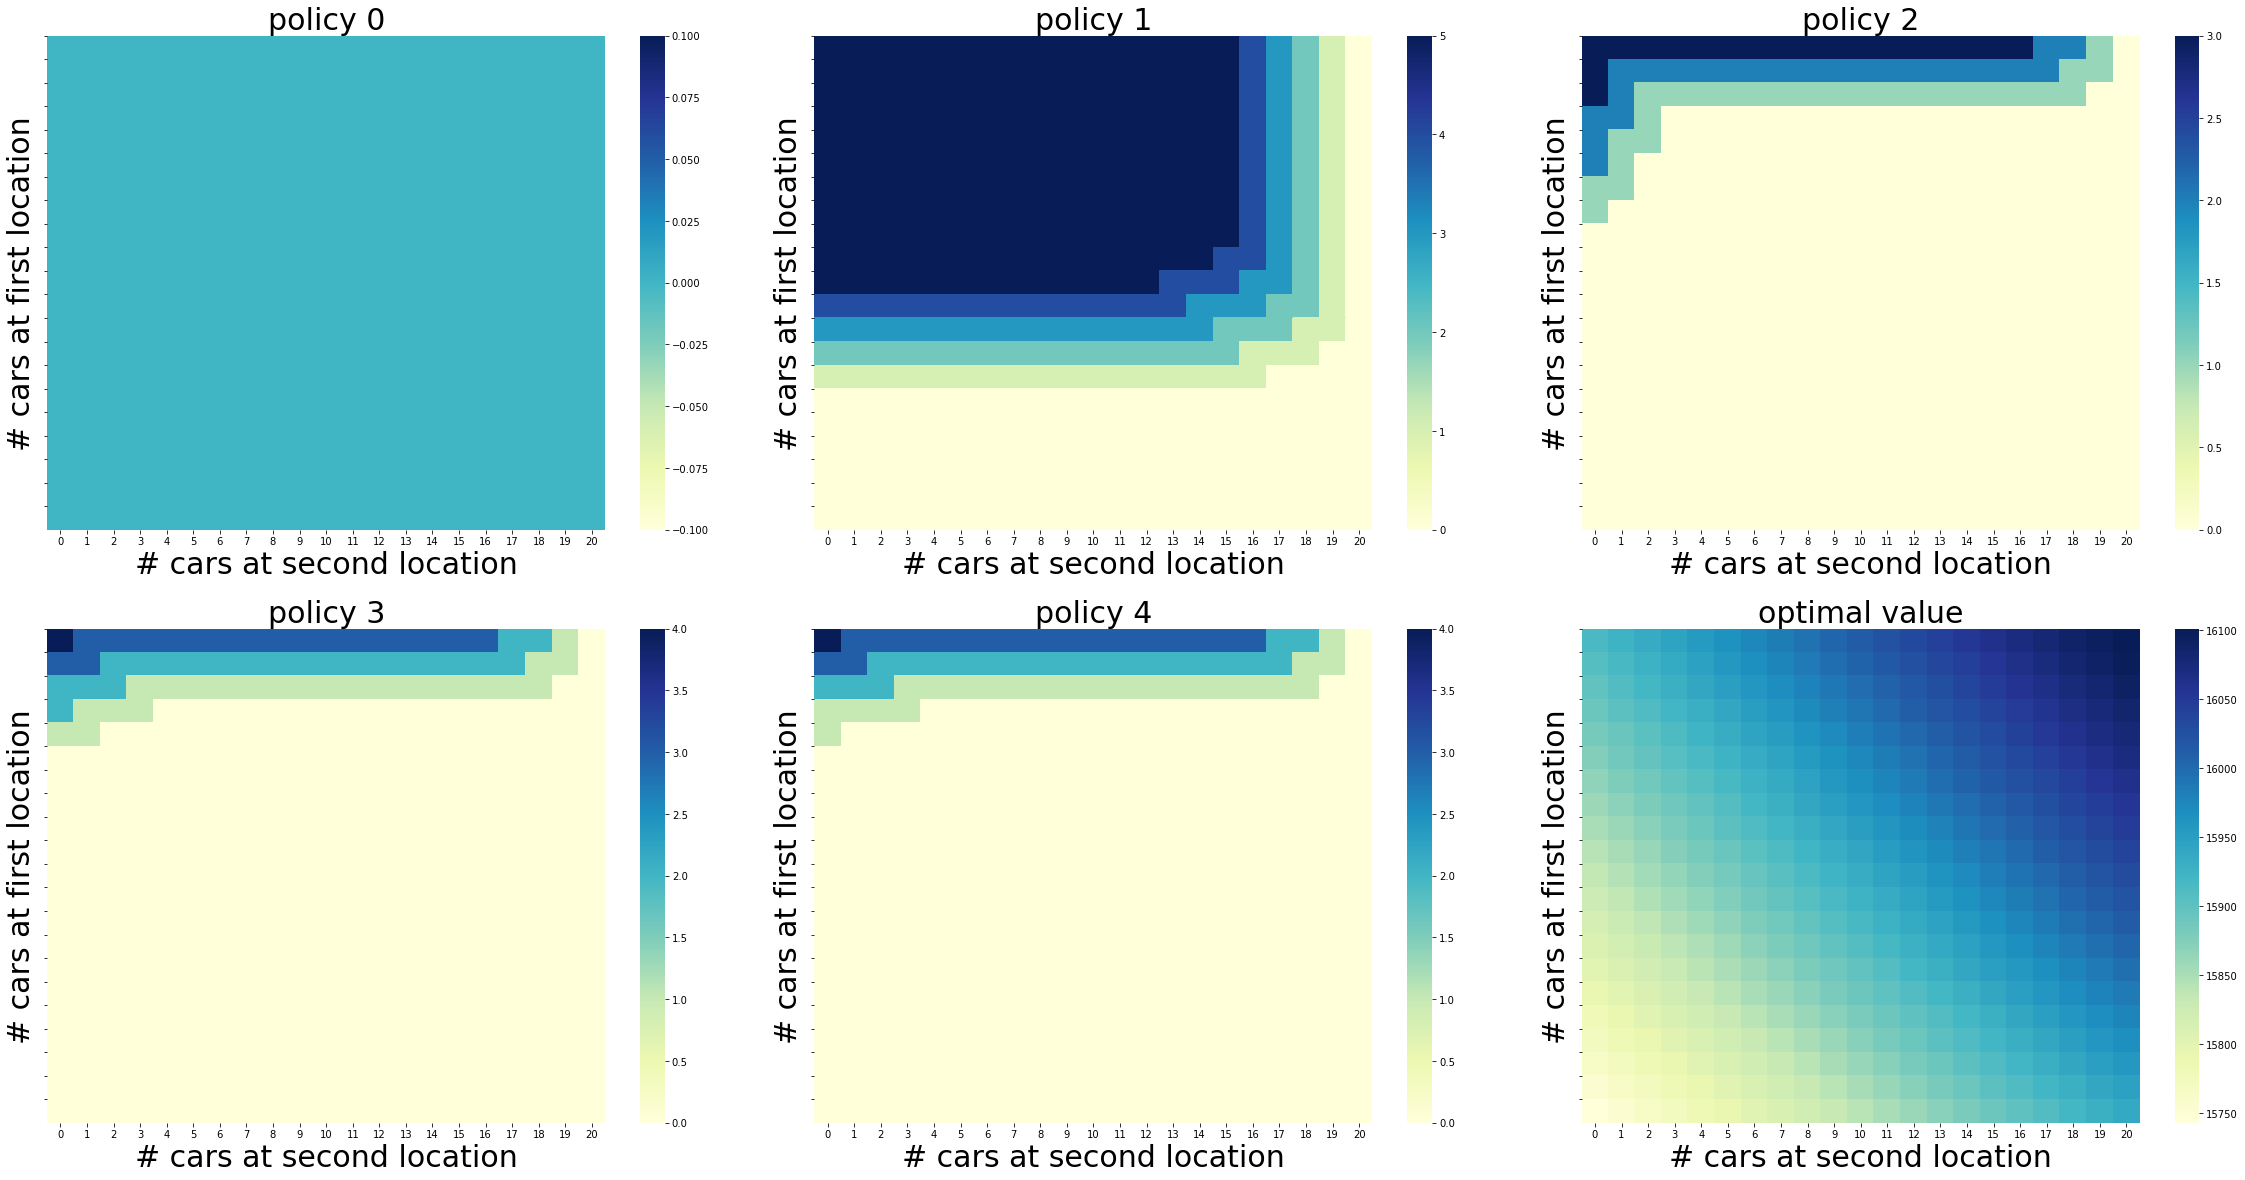

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0]
 [4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 0]]


In [45]:
gamma=1
purchase_cost=2
MAX_capacity=20
value = np.zeros((MAX_capacity + 1, MAX_capacity + 1))
policy = np.zeros(value.shape, dtype=np.int)
iterations = 0
_, axes = plt.subplots(2, 3, figsize=(40, 20))
plt.subplots_adjust(wspace=0.1, hspace=0.2)
axes = axes.flatten()
while True:
    curve(iterations,policy,20)
    policy=policy.astype(int)
    old_policy=policy.copy()
    value=policy_evaluation(value,policy,gamma,purchase_cost)
    policy=policy_improvement(value,gamma,purchase_cost)
    policy=policy.astype(int)      
    if np.array_equal(old_policy,policy)==True:
        optimal_curve(iterations,value,20)
        break 
    iterations += 1
plt.show()
print(policy)